# meng 21200 pset 1

### init

In [63]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
import pandas as pd

### problem 1

a

In [64]:
# defining function
def f(x):
    return x * math.exp(x) - math.sin(8 * x) - 0.5

b

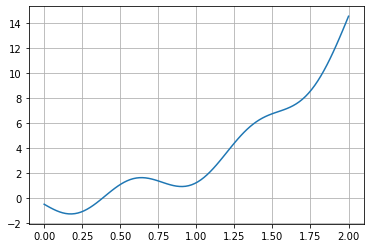

In [65]:
# plotting function
x = np.linspace(0, 2, num=100)
y = [f(i) for i in x]
plt.plot(x, y)
plt.grid()

In [66]:
# finding roots
# obvious from graph that only one root exists
trueValue = brentq(f, 0, 2)
trueValue

0.3845760112195518

c

In [67]:
# defining bisection function
def bisection(f, x1, x2, tol):
    error = 100
    i = 0
    itLimit = 1000
    while error > tol and i < itLimit:
        i += 1
        approx = (x1 + x2) / 2
        if f(x1) * f(approx) < 0:
            x2 = approx
        else:
            x1 = approx
        error = (x2 - x1) / 2
    if i < itLimit:
        return approx

d

In [68]:
bisection(f, 0, 2, 0.0001)

0.3846435546875

e

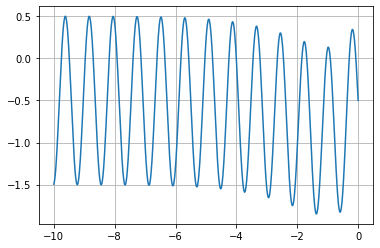

In [69]:
x = np.linspace(-10, 0, num=1000)
y = [f(i) for i in x]
plt.plot(x, y)
plt.grid()

In [70]:
bisection(f, -10, 0, 0.0001)

-5.822601318359375

In [71]:
bisection(f, -10, -8, 0.0001)

-8.1807861328125

In [72]:
bisection(f, -8.8, -8.6, 0.0001)

-8.7048828125

Got different results, because the program was searching in a different interval each time. Distinct roots exist within these intervals.

### problem 2

0.3845672607421875

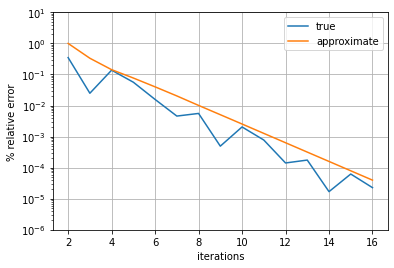

In [73]:
def bisectionErrorPlot(f, x1, x2, tol):
    error = 100
    tpre = []
    apre = []
    i = 0
    papprox = 0
    while error > tol:
        i += 1
        approx = (x1 + x2) / 2
        if f(x1) * f(approx) < 0:
            x2 = approx
        else:
            x1 = approx
        error = (x2 - x1) / 2
        tpre.append(abs((trueValue - approx) / trueValue))
        apre.append(abs((papprox - approx) / approx))
        papprox = approx

    itNum = [j for j in range(2, i)]
    plt.ylabel('% relative error')
    plt.xlabel('iterations')
    plt.yscale("log")
    plt.ylim([0.000001, 10])
    plt.plot(itNum, tpre[2:], label="true")
    plt.plot(itNum, apre[2:], label="approximate")
    plt.legend(loc="upper right")
    plt.grid()
    return approx
bisectionErrorPlot(f, 0, 2, 0.00001)


### problem 3

a

In [74]:
# interpreting the problem statement as: subintervals is the size of each subinterval, rather than the number of subintervals
def BisectMany(f, x1, x2, tol, subintervals):
    num = math.trunc((x2 - x1) / subintervals)
    roots = []
    for i in range(num + 1):
        lower = x1 + subintervals * i
        upper = x1 + subintervals * (i + 1)
        if f(lower) * f(upper) > 0:
            continue

        # the upper bound of an interval cannot exceed x2
        if upper > x2:
            upper = x2
        # if the last interval only contains x2, end the search
        if lower == x2:
            break
        roots.append(bisection(f, lower, upper, tol))
        # using pandas here to help format display
        df = pd.DataFrame(roots, columns=['roots'])
    return df

b

In [75]:
BisectMany(f, -10, 2, 0.00001, 2)

,roots
0,-8.180893
1,-7.919846
2,0.384567


In [76]:
BisectMany(f, -10, 2, 0.00001, 1)

,roots
0,-8.180893
1,-7.919846
2,-5.034866
3,-4.783707
4,-1.046829
5,-0.916428
6,0.384567


In [77]:
BisectMany(f, -10, 2, 0.00001, 0.1)

,roots
0,-9.751941
1,-9.490320
2,-8.966467
3,-8.705042
4,-8.180896
5,-7.919836
6,-7.395178
7,-7.134851
8,-6.609143
9,-6.350232


In [78]:
BisectMany(f, -10, 2, 0.00001, 0.01)

,roots
0,-9.751934
1,-9.490332
2,-8.966465
3,-8.705020
4,-8.180918
5,-7.919863
6,-7.395176
7,-7.134863
8,-6.609160
9,-6.350254


Decreasing the size of the subintervals increases the number of "roots" found, but from the graph, it is obvious that some roots found are far off from actual roots of the function.

### problem 4

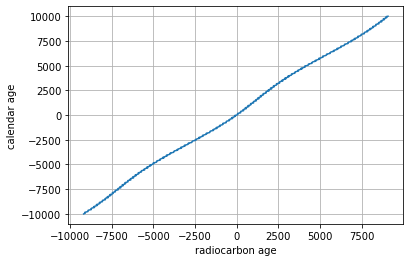

In [79]:
# g is a function representing the different between calendar age, x, and radiocarbon age
# radiocarbon age is subtracted from both sides of the given equation
def g(x):
    return 0.92 * x - 4758 + \
           250 * math.cos((x + 700) * math.pi / 4500) + \
           50 * math.sin(x * math.pi / 100) + \
           20 * math.cos(x * 2 * math.pi / 11)

r = np.linspace(-10000, 10000, num=1000)
c = [g(i) + 4518 for i in r]
plt.xlabel('radiocarbon age')
plt.ylabel('calendar age')
plt.plot(c, r)
plt.grid()

from the graph, we can see that for a radiocarbon age of 4518 years, the calendar age will be between 5000 and 7500 years. we will search for roots in this interval.

In [80]:
a = BisectMany(g, 5000, 7500, 0.001, 0.1)
roots = a['roots'].values.tolist()
# filter out roots found that aren't actually roots, i.e. produce an absolute error more than 0.01
# note that the answer output will change depending on the parameters (tol and subintervals)
ans = []
for i in roots:
    if abs(g(i)) < 0.01:
        ans.append(i)
print(f"the range is {round(min(ans), 2)} to {round(max(ans), 2)}")

the range is 5248.62 to 5363.65


### problem 5

note: parts a and b are from the discussion notebook

a

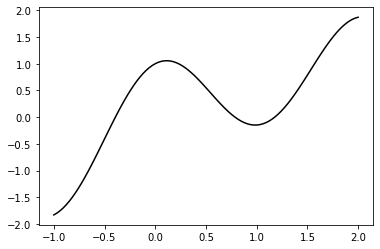

In [81]:
def g(x):
    return np.sin(x) + np.cos(3 * x)

x = np.linspace(-1, 2, 100)
plt.plot(x, g(x),'k')

b

In [82]:
def g_prime_n(x,n):
    """
    n-th order derivative of g(x) = sin(x)+cos(3x)
    the derivative of sin(x) or cos(x) is the same every 4 order.
    """
    n = int(n)
    assert n >= 0
    if n%4 == 0 :
        return np.sin(x)+3**n*np.cos(3*x)
    if n%4 == 1:
        return np.cos(x)+3**n*(-np.sin(3*x))
    if n%4 == 2:
        return -np.sin(x)+3**n*(-np.cos(3*x))
    if n%4 == 3:
        return -np.cos(x)+3**n*(np.sin(3*x))

def taylor_g(x, x0, n):
    """ n is the order, x0 is the center of the taylor expansion."""
    result = 0
    for k in range(n+1):
        result += (x-x0)**k/np.math.factorial(k)*g_prime_n(x0,k)
    return result

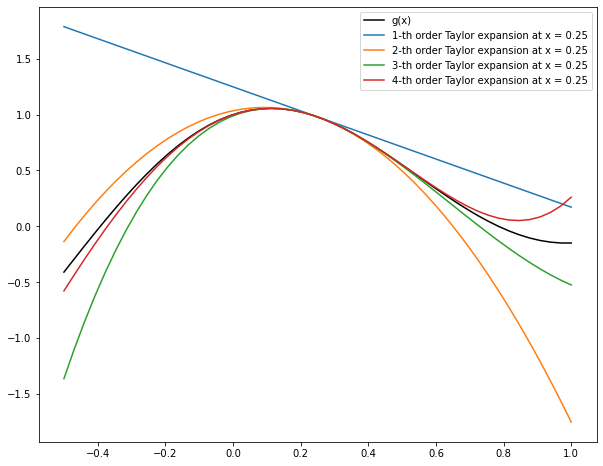

In [83]:
x  = np.linspace(-0.5, 1)
x0 = 0.25
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(x, g(x), 'k', label = 'g(x)')
for n in range(1, 4 + 1):
    ax.plot(x, taylor_g(x, x0, n), label = f'{n}-th order Taylor expansion at x = {x0}')
ax.legend(loc='best')

c

In [84]:
print("true percent relative errors of Taylor approximations:")
for n in range(1, 4 + 1):
    error = abs((g(0.1) - taylor_g(0.1, x0, n)) / g(0.1))
    print(f"{n}-th order: {round(error * 100, 3)}%")

true percent relative errors of Taylor approximations:
1-th order: 8.086%
2-th order: 0.801%
3-th order: 0.128%
4-th order: 0.009%


order 4 approximation is required to acheive true relative error < 0.1%

d

In [85]:
error = 1
n = 1
best = taylor_g(0.1, x0, 1)
while error >= 0.01:
    n += 1
    current = taylor_g(0.1, x0, n)
    error = abs((best - current) / best)
    best = current
print(f"order {n} approximation is required to acheive true relative error < 1%")

order 3 approximation is required to acheive true relative error < 1%


### problem 6

a

In [86]:
def h(x):
    return np.sin(x)
def h_prime_n(x, n):
    """
    n-th order derivative of h(x) = sin(x)
    the derivative of sin(x) is the same every 4 order.
    """
    n = int(n)
    assert n >= 0
    if n%4 == 0 :
        return np.sin(x)
    if n%4 == 1:
        return np.cos(x)
    if n%4 == 2:
        return -np.sin(x)
    if n%4 == 3:
        return -np.cos(x)

def taylor_h(x, x0, n):
    """ n is the order, x0 is the center of the taylor expansion."""
    result = 0
    for k in range(n+1):
        result += (x-x0)**k/np.math.factorial(k)*h_prime_n(x0,k)
    return result

b

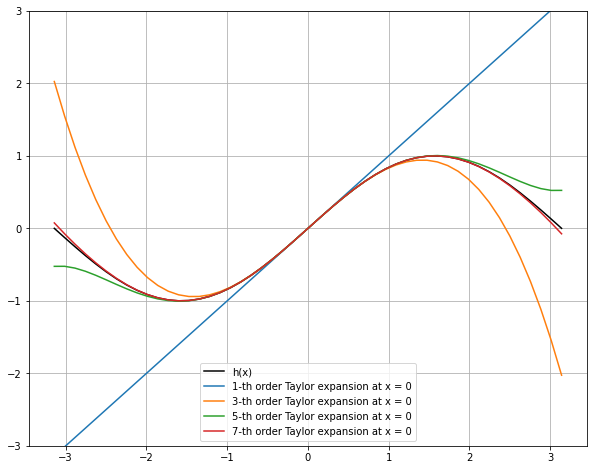

In [87]:
x  = np.linspace(-math.pi, math.pi)
# by convention, the Taylor series for sine is centered at the origin
x0 = 0
fig, ax = plt.subplots(figsize = (10, 8))
plt.ylim([-3, 3])
plt.grid()
ax.plot(x, h(x), 'k', label = 'h(x)')
for m in range(4):
    n = 2 * m + 1
    ax.plot(x, taylor_h(x, x0, n), label = f'{n}-th order Taylor expansion at x = {x0}')
ax.legend(loc='best')

c, d

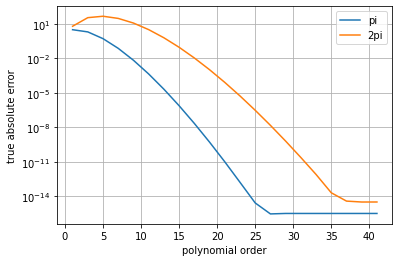

In [88]:
# note that sin(pi) = 0
order = []
error1 = []
error2 = []
for m in range(0, 21):
    n = 2 * m + 1
    order.append(n)
    error1.append(abs(taylor_h(math.pi, x0, n)))
    error2.append(abs(taylor_h(2 * math.pi, x0, n)))
plt.ylabel('true absolute error')
plt.xlabel('polynomial order')
plt.yscale("log")
plt.plot(order, error1, label='pi')
plt.plot(order, error2, label='2pi')
plt.legend(loc='best')
plt.grid()


analytically, the radius of convergence of the Taylor series of sin is infinite, and there should be no limit to the precision to which we can approximate sin(x) at pi. however, python's double float class can only hold ~15 decimal places, which limits the precision we can achieve computationally because of truncation error. this is shown in the graph, which begins to flatten around 10^-15.

the Taylor polynomials are more accurate at pi. this is because the closer to the center of the approximation, or the origin in our case, the faster the Taylor series converges.